# Strings

In [1]:
s = "python"

In [2]:
# Concatenation
print(s+s)

pythonpython


In [3]:
# Repetition
print(s*3)

pythonpythonpython


In [4]:
# Iteration
for char in s:
    print(char, end=" ")

p y t h o n 

In [5]:
# Indexing
for i in range(len(s)):
    print(i, s[i])

0 p
1 y
2 t
3 h
4 o
5 n


In [6]:
# Slicing
print(s[2:4])
print(s[:3])
print(s[3:])

th
pyt
hon


In [7]:
# Searching
print("n" in s)
print("N" not in s)

True
True


In [8]:
# Searching works on substrings
print("on" in s)

True


In [9]:
# Conversion to list
print(list("abc"))
print("a b c".split())
print("a,b,c".split(",")) # can also work with regular expressions

['a', 'b', 'c']
['a', 'b', 'c']
['a', 'b', 'c']


In [10]:
# Conversion back to string
alphabet = list("abcdefghijklmnopqrstuvwxyz")
# s = ""
# for char in alphabet:
#     s+= char
# print(s)

print("".join(alphabet))
alphabet = "".join(alphabet)

abcdefghijklmnopqrstuvwxyz


In [11]:
# Character codes
for char in alphabet:
    print(ord(char), end=" ")
for char in alphabet.upper():
    print(ord(char), end=" ")

97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 

My substring in string function

In [12]:
# This function returns sub is a substring of s.
# Yes it's absurdly slow but we live with that.
def substring(sub, s):
    if len(sub) == 0: 
        return True
    for i in range(len(s)):
        if len(sub) == 1 and sub[0] == s[i]:
            return True
        if s[i] == sub[0]:
            return (substring(sub[1:], s[i:]))
    return False

In [13]:
# Testing
print(substring("any", "many"))
print(substring("any", "mny"))
print(substring("h", "hey"))
print(substring("h", "ehy"))
print(substring("h", "eyh"))
print(substring("b", "hey"))
print(substring("", "hey"))
# expect: True, False, True, True, True, False, True

True
False
True
True
True
False
True


In-class susbtring in string function

In [14]:
# This function returns sub is a substring of s.
# The algorithm is O(nk) where n = len(s) and k = len(sub).
def substring0(sub, s):
    for i in range(len(s) - len(sub) + 1):  # n = k iterations
        if sub == s[i: i+len(sub)]:    # O(k) to slice
            return True
    return False

In [15]:
# Testing
print(substring0("any", "many"))
print(substring0("any", "mny"))
print(substring0("h", "hey"))
print(substring0("h", "ehy"))
print(substring0("h", "eyh"))
print(substring0("b", "hey"))
print(substring0("", "hey"))
# expect: True, False, True, True, True, False, True

True
False
True
True
True
False
True


Liv's solution

In [16]:
# This function returns whether sub is a substring of s.
# THe algorithm is O(nk) hwere n = len(s) and k =len(sub).
# The best case scenario would be moe like O(n).
def substring1(sub, s):
    for i in range(len(s) - len(sub) + 1):
        for j in range(len(sub)):
            found = True
            if s[i+j] != sub[j]:
                found = False
                break
        if found:
            return True
        return False

In [17]:
# Worst case search looks like this
print(substring1("a"* 8 + "b", "a" * 16))

False


In [18]:
def built_in(sub, s):
    return sub in s

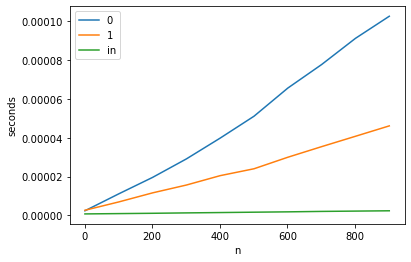

In [19]:
# This function times a sorting function on a range of problem sizes.
from random import randrange
def timer(search, lengths):
    times = []
    for n in lengths:
        s = "a" * n
        sub = "a" * (n // 2) + "b"
        time = %timeit -n1 -r1 -o -q search(sub, s)
        times.append(time.average)
    return times


# This code plots some search times.
from matplotlib import pyplot
from numpy import arange

n = arange(1, 1000, 100)

# pyplot.plot(n, timer(substring, n), label="Mine")
pyplot.plot(n, timer(substring0, n), label="0")
pyplot.plot(n, timer(substring1, n), label="1")
pyplot.plot(n, timer(built_in, n), label="in")

pyplot.ylabel("seconds")
pyplot.xlabel("n")
pyplot.legend()
pyplot.show()